In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [50]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
lending_df.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [51]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df["loan_status"]

# Separate the X variable, the features
X = lending_df.drop(columns="loan_status")


In [52]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [53]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [54]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [55]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [56]:
y_test.value_counts()

0    18765
1      619
Name: loan_status, dtype: int64

---

In [57]:
y_train.value_counts()

0    56271
1     1881
Name: loan_status, dtype: int64

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [58]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
LR_model = LogisticRegression(random_state=1)

# Fit the model using training data
LR_model.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [59]:
# Make a prediction using the testing data
y_pred = LR_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
pd.DataFrame(y_pred, columns =["y_pred"]).value_counts()

y_pred
0         18719
1           665
dtype: int64

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [61]:
from sklearn.metrics import accuracy_score
# Print the balanced_accuracy score of the model
accuracy_score(y_test, y_pred)

0.9918489475856377

In [62]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, y_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

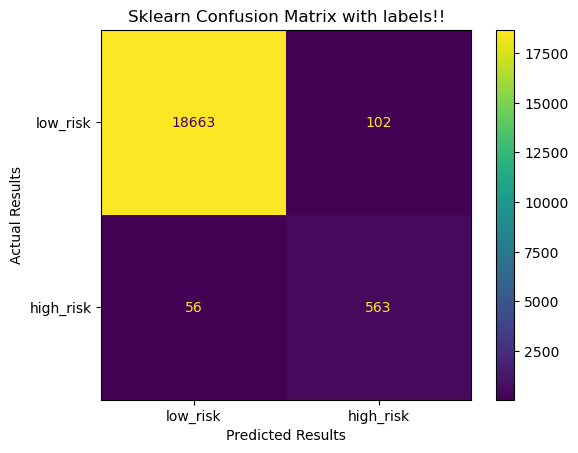

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['low_risk','high_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!',
                xlabel='Predicted Results',
                ylabel='Actual Results')
plt.show()

In [64]:
# Print the classification report for the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model is doing a great job predicting healthy loans(true positive, 0), but it's fairly difficult to identify high-risk loans(1). 

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [65]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)



In [66]:
from collections import Counter
# Count the distinct values of the resampled labels data
Counter(y_resampled)

Counter({0: 56271, 1: 56271})

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [67]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logreg = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using the resampled training data
logreg.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
y_resampled_pred = logreg.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [68]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, y_resampled_pred)


0.9936781215845847

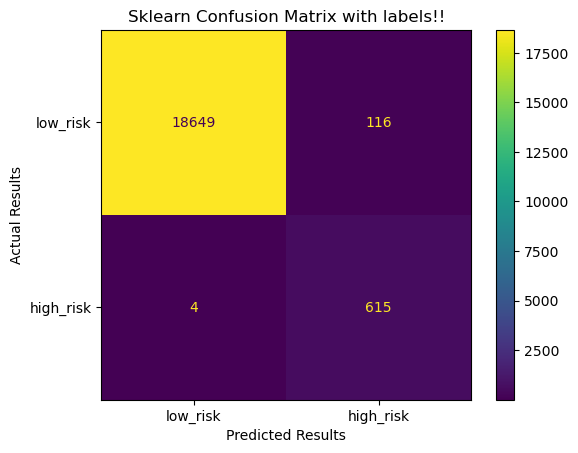

In [69]:
# Generate a confusion matrix for the model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_resampled_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['low_risk','high_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!',
                xlabel='Predicted Results',
                ylabel='Actual Results')
plt.show()

In [70]:
# Print the classification report for the model
print(classification_report(y_test, y_resampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** This model functioned most likely identically with the previous model on healthy loans(0). On top of that, there is also small improvemnt in high-risk loans' "recall".